# Title: Prdicting rental prices using Airbnb listings and metric information
1) Find out what investment properties and listing features drive growth following 3 objectives

a) Understand which features have influence on pricing of properties and the profitability of the propety_types.

b) Features which have impact on booking by understanding interest and preference
 
d) Feasibility of providing additional services in return for a fee such as laundry services by analysing effect of already provided cleaning services services on price

2) Train and test 3 price and revenue predicting machine learning models to find out which has the best predictive accuracy and performance. Predict   price of properties and the annual revenue based on property features.

3) Make data driven reccommendations to drive growth

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder #oneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR


In [125]:
#load the airbnb listing dataset fro seatle in USA
airbnb_df = pd.read_csv("C:/Users/naddy/OneDrive/Downloads/listings.txt", sep= ",")

In [126]:
#displays all the columns of the dataframe. 

pd.set_option('display.max_columns', 92)
display(airbnb_df)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [127]:
airbnb_df1 = airbnb_df.copy()

# Examine the dataset 

In [128]:
#list of the 92 columns in the dataset
airbnb_df1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', '

In [129]:
#get description statistics of the dataset
airbnb_df1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [130]:
airbnb_df1.info

<bound method DataFrame.info of             id                            listing_url       scrape_id last_scraped                                 name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                      thumbnail_url  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04         Stylish Queen Anne Apartment                                                NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                none                                                NaN                                                NaN                                                NaN                       

In [131]:
#checking the prices per day/week/month and the number of days the listing available for booking in one month,
#2 months ,3 month and  one year. With the number of listings done through the whole
availability_df = airbnb_df1[['price','weekly_price', 'monthly_price','has_availability','availability_30', 'availability_60', 
                                   'availability_90', 'availability_365', 'host_total_listings_count']]
availability_df 


,price,weekly_price,monthly_price,has_availability,availability_30,availability_60,availability_90,availability_365,host_total_listings_count
0,$85.00,NaN,NaN,t,14,41,71,346,3.0
1,$150.00,"$1,000.00","$3,000.00",t,13,13,16,291,6.0
2,$975.00,NaN,NaN,t,1,6,17,220,2.0
3,$100.00,$650.00,"$2,300.00",t,0,0,0,143,1.0
4,$450.00,NaN,NaN,t,30,60,90,365,2.0
...,...,...,...,...,...,...,...,...,...
3813,$359.00,NaN,NaN,t,18,32,32,32,354.0
3814,$79.00,NaN,NaN,t,6,26,44,273,1.0
3815,$93.00,$450.00,NaN,t,29,59,88,88,1.0
3816,$99.00,NaN,NaN,t,30,60,90,179,1.0


In [132]:
# check number of each unique value in the has_availability column.
#Assuming the t means yes, then listing was available for booking. it will me dropped since it contains only t in that column. 
airbnb_df1["has_availability"].value_counts()

t    3818
Name: has_availability, dtype: int64

In [133]:
#rename the availability_365 column to booked_365 assuming the values in the column indicates
#the number of days that the listing is available and booked in a year
airbnb_df1.rename(columns={"availability_365" : "booked_365"}, inplace=True)

In [134]:
airbnb_df1["booked_365"]

0       346
1       291
2       220
3       143
4       365
       ... 
3813     32
3814    273
3815     88
3816    179
3817      7
Name: booked_365, Length: 3818, dtype: int64

In [135]:
airbnb_df1["booked_365"].isnull().sum()

0

In [136]:
#function to convert object to float and remove dollar sign
def delete_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))


In [137]:
#convert  the response variable - price to float and remove dollar sign
airbnb_df1["price"]=airbnb_df1["price"].apply(lambda x: delete_dollar_sign(x))
airbnb_df1["price"]

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [138]:
#remove dollar sign and convert to float
airbnb_df1["cleaning_fee"]=airbnb_df1["cleaning_fee"].apply(lambda x: delete_dollar_sign(x))
airbnb_df1["cleaning_fee"]


0         NaN
1        40.0
2       300.0
3         NaN
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      NaN
Name: cleaning_fee, Length: 3818, dtype: float64

In [290]:
#remove dollar sign and convert to float
airbnb_df1["extra_people"]=airbnb_df1["extra_people"].apply(lambda x: delete_dollar_sign(x))
airbnb_df1["extra_people"]

0        5.0
1        0.0
2       25.0
3        0.0
4       15.0
        ... 
3813     0.0
3814    25.0
3815    20.0
3816     0.0
3817     0.0
Name: extra_people, Length: 3818, dtype: float64

In [139]:
#Filling in the cleaning service with zeros because assuming that not all host provide cleaning services
#perhaps the prices are lower for such places 
airbnb_df1["cleaning_fee"].fillna(0, inplace=True)


In [140]:
#check number of missing values. will fill in together with the other numerical values.
airbnb_df1["cleaning_fee"].isnull().sum()

0

In [141]:
#checking the transformed column
airbnb_df1["cleaning_fee"]

0         0.0
1        40.0
2       300.0
3         0.0
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      0.0
Name: cleaning_fee, Length: 3818, dtype: float64

In [142]:
#creating  a new column annual_revenue and filling it with the product of price and booked_365 column
airbnb_df1['annual_revenue'] = airbnb_df1['price'] * airbnb_df1["booked_365"]

In [143]:
#creating a new column by dividing booked_365 by the number of days in a year
airbnb_df1['booking_probability'] = airbnb_df1["booked_365"].div(365) * 100

In [452]:
#display  the 3 newly added columns
airbnb_df1[['price', 'annual_revenue', 'booking_probability']]

,price,annual_revenue,booking_probability
0,85.0,29410.0,94.794521
1,150.0,43650.0,79.726027
2,975.0,214500.0,60.273973
3,100.0,14300.0,39.178082
4,450.0,164250.0,100.000000
...,...,...,...
3813,359.0,11488.0,8.767123
3814,79.0,21567.0,74.794521
3815,93.0,8184.0,24.109589
3816,99.0,17721.0,49.041096


In [145]:
#checking what percentage of the data is missing in each column
missing_values_percent =  airbnb_df1.isnull().sum() * 100/len(airbnb_df1)
missing_values_percent.sort_values(ascending = False)


license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_checkin                17.234154
review_scores_accuracy               17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
last_review                          16.422211
first_review                         16.422211
reviews_per_month                    16.422211
space                                14.903091
host_response

# Handling missing data

In [146]:
# drop license, square_feet, monthly_price since they have over 50 percent of nulls
airbnb_df1.drop(missing_values_percent[missing_values_percent > 50].keys(), axis =1, inplace = True)

In [148]:
#check these columns to find out if they have any variations that may be useful in the model training
airbnb_df1[["country_code", "country", "city", "state", "smart_location", "host_verifications", "host_location", "host_about",
                "jurisdiction_names", "market", "requires_license"]]

,country_code,country,city,state,smart_location,host_verifications,host_location,host_about,jurisdiction_names,market,requires_license
0,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'reviews', 'kba']","Seattle, Washington, United States","I am an artist, interior designer, and run a s...",WASHINGTON,Seattle,f
1,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'linkedin', 're...","Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,WASHINGTON,Seattle,f
2,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'google', 'reviews', 'jumio']","Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,WASHINGTON,Seattle,f
3,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'jum...","Seattle, Washington, United States",NaN,WASHINGTON,Seattle,f
4,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'kba']","Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",WASHINGTON,Seattle,f
...,...,...,...,...,...,...,...,...,...,...,...
3813,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'linkedin', 'reviews', 'jum...",US,NaN,WASHINGTON,Seattle,f
3814,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'jum...","Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,WASHINGTON,Seattle,f
3815,US,United States,Seattle,WA,"Seattle, WA",['phone'],US,NaN,WASHINGTON,Seattle,f
3816,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'kba']","Tacoma, Washington, United States",NaN,WASHINGTON,Seattle,f


In [298]:
# drop columns that have mostly same values all through 
airbnb_df1.drop(["country_code", "country", "city", "state", "smart_location", "host_verifications", "host_location",
                "jurisdiction_names", "market", "requires_license"], axis=1, inplace=True)


In [42]:
airbnb_df1[["calendar_last_scraped", "host_name","host_id","host_picture_url", 
                   "street", "description", "calendar_updated", 
                     "scrape_id", "host_url", "last_scraped", "latitude", "host_thumbnail_url", 
                    "listing_url","longitude","name", "zipcode", 'neighbourhood_group_cleansed', 
                    "picture_url"]]

,calendar_last_scraped,host_name,host_id,host_picture_url,street,description,calendar_updated,scrape_id,host_url,last_scraped,latitude,host_thumbnail_url,listing_url,longitude,name,zipcode,neighbourhood_group_cleansed,picture_url
0,2016-01-04,Maija,956883,https://a0.muscache.com/ac/users/956883/profil...,"Gilman Dr W, Seattle, WA 98119, United States",Make your self at home in this charming one-be...,4 weeks ago,20160104002432,https://www.airbnb.com/users/show/956883,2016-01-04,47.636289,https://a0.muscache.com/ac/users/956883/profil...,https://www.airbnb.com/rooms/241032,-122.371025,Stylish Queen Anne Apartment,98119,Queen Anne,https://a1.muscache.com/ac/pictures/67560560/c...
1,2016-01-04,Andrea,5177328,https://a0.muscache.com/ac/users/5177328/profi...,"7th Avenue West, Seattle, WA 98119, United States",Chemically sensitive? We've removed the irrita...,today,20160104002432,https://www.airbnb.com/users/show/5177328,2016-01-04,47.639123,https://a0.muscache.com/ac/users/5177328/profi...,https://www.airbnb.com/rooms/953595,-122.365666,Bright & Airy Queen Anne Apartment,98119,Queen Anne,https://a0.muscache.com/ac/pictures/14409893/f...
2,2016-01-04,Jill,16708587,https://a1.muscache.com/ac/users/16708587/prof...,"West Lee Street, Seattle, WA 98119, United States",New modern house built in 2013. Spectacular s...,5 weeks ago,20160104002432,https://www.airbnb.com/users/show/16708587,2016-01-04,47.629724,https://a1.muscache.com/ac/users/16708587/prof...,https://www.airbnb.com/rooms/3308979,-122.369483,New Modern House-Amazing water view,98119,Queen Anne,https://a2.muscache.com/ac/pictures/b4324e0f-a...
3,2016-01-04,Emily,9851441,https://a2.muscache.com/ac/users/9851441/profi...,"8th Avenue West, Seattle, WA 98119, United States",A charming apartment that sits atop Queen Anne...,6 months ago,20160104002432,https://www.airbnb.com/users/show/9851441,2016-01-04,47.638473,https://a2.muscache.com/ac/users/9851441/profi...,https://www.airbnb.com/rooms/7421966,-122.369279,Queen Anne Chateau,98119,Queen Anne,https://a0.muscache.com/ac/pictures/94146944/6...
4,2016-01-04,Emily,1452570,https://a0.muscache.com/ac/users/1452570/profi...,"14th Ave W, Seattle, WA 98119, United States",Cozy family craftman house in beautiful neighb...,7 weeks ago,20160104002432,https://www.airbnb.com/users/show/1452570,2016-01-04,47.632918,https://a0.muscache.com/ac/users/1452570/profi...,https://www.airbnb.com/rooms/278830,-122.372471,Charming craftsman 3 bdm house,98119,Queen Anne,https://a1.muscache.com/ac/pictures/6120468/b0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2016-01-04,Bo,31148752,https://a2.muscache.com/ac/users/31148752/prof...,"Northwest 48th Street, Seattle, WA 98107, Unit...",Our 3BR/2BA house boasts incredible views of t...,today,20160104002432,https://www.airbnb.com/users/show/31148752,2016-01-04,47.664295,https://a2.muscache.com/ac/users/31148752/prof...,https://www.airbnb.com/rooms/8101950,-122.359170,3BR Mountain View House in Seattle,98107,Other neighborhoods,https://a2.muscache.com/ac/pictures/103217071/...
3814,2016-01-04,Glen,46566046,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,"Fuhrman Avenue East, Seattle, WA 98102, United...",800 square foot 1 bedroom basement apartment w...,2 days ago,20160104002432,https://www.airbnb.com/users/show/46566046,2016-01-04,47.649552,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,https://www.airbnb.com/rooms/8902327,-122.318309,Portage Bay View!-One Bedroom Apt,98102,Capitol Hill,https://a2.muscache.com/ac/pictures/626d4b1f-6...
3815,2016-01-04,Virginia,52791370,https://a2.muscache.com/ac/pictures/efc75826-1...,"South Laurel Street, Seattle, WA 98178, United...","Very comfortable lower unit. Quiet, charming m...",4 days ago,20160104002432,https://www.airbnb.com/users/show/52791370,2016-01-04,47.508453,https://a2.muscache.com/ac/pictures/efc75826-1...,https://www.airbnb.com/rooms/10267360,-122.240607,Private apartment view of Lake WA,98178,Rainier Valley,https

The following columns are being dropped after reviewing the dataset and the attributes that are relevant to the problem

In [149]:
#drop some columns athat are host specific and generally not useful to the problem 
airbnb_df1.drop(["calendar_last_scraped", "host_name","host_id","host_picture_url", 
                   "street", "calendar_updated", 
                     "scrape_id", "host_url", "last_scraped", "host_thumbnail_url", 
                    "listing_url", "zipcode", 'neighbourhood_group_cleansed', 
                    "picture_url"],axis =1, inplace=True)


In [150]:
#check columns to determine how relevant they may be.
airbnb_df1[["availability_30","availability_60", "has_availability", "availability_90", 'xl_picture_url', "weekly_price",
               "host_total_listings_count",'thumbnail_url', 'medium_url', 'xl_picture_url', 'review_scores_accuracy',
                 'review_scores_location', 'review_scores_checkin','review_scores_accuracy','reviews_per_month', 
                 'first_review', 'last_review',
                'require_guest_profile_picture', "review_scores_communication"]].sample(10)

,availability_30,availability_60,has_availability,availability_90,xl_picture_url,weekly_price,host_total_listings_count,thumbnail_url,medium_url,xl_picture_url,review_scores_accuracy,review_scores_location,review_scores_checkin,review_scores_accuracy,reviews_per_month,first_review,last_review,require_guest_profile_picture,review_scores_communication
2450,30,60,t,90,https://a1.muscache.com/ac/pictures/103240639/...,$450.00,1.0,https://a1.muscache.com/ac/pictures/103240639/...,https://a1.muscache.com/im/pictures/103240639/...,https://a1.muscache.com/ac/pictures/103240639/...,10.0,10.0,10.0,10.0,1.59,2015-08-07,2015-10-27,f,10.0
1079,2,32,t,60,https://a2.muscache.com/ac/pictures/108678494/...,"$1,100.00",1.0,https://a2.muscache.com/ac/pictures/108678494/...,https://a2.muscache.com/im/pictures/108678494/...,https://a2.muscache.com/ac/pictures/108678494/...,10.0,10.0,10.0,10.0,2.73,2015-09-17,2015-12-01,f,10.0
97,21,48,t,78,NaN,NaN,36.0,NaN,NaN,NaN,10.0,8.0,10.0,10.0,0.11,2015-03-29,2015-03-29,t,10.0
1089,18,44,t,67,https://a1.muscache.com/ac/pictures/102878252/...,"$1,000.00",1.0,https://a1.muscache.com/ac/pictures/102878252/...,https://a1.muscache.com/im/pictures/102878252/...,https://a1.muscache.com/ac/pictures/102878252/...,10.0,10.0,10.0,10.0,5.43,2015-09-11,2015-12-28,f,10.0
2047,0,0,t,0,https://a1.muscache.com/ac/pictures/54348341/8...,NaN,1.0,https://a1.muscache.com/ac/pictures/54348341/8...,https://a1.muscache.com/im/pictures/54348341/8...,https://a1.muscache.com/ac/pictures/54348341/8...,9.0,9.0,10.0,9.0,1.91,2013-08-10,2015-05-25,f,10.0
2435,0,0,t,0,https://a1.muscache.com/ac/pictures/65488185/0...,$595.00,3.0,https://a1.muscache.com/ac/pictures/65488185/0...,https://a1.muscache.com/im/pictures/65488185/0...,https://a1.muscache.com/ac/pictures/65488185/0...,9.0,10.0,10.0,9.0,0.51,2015-03-15,2015-11-19,f,10.0
1636,25,55,t,80,https://a0.muscache.com/ac/pictures/17437172/5...,"$1,149.00",8.0,https://a0.muscache.com/ac/pictures/17437172/5...,https://a0.muscache.com/im/pictures/17437172/5...,https://a0.muscache.com/ac/pictures/17437172/5...,10.0,9.0,10.0,10.0,0.66,2014-04-07,2015-11-16,f,10.0
2860,1,30,t,60,https://a2.muscache.com/ac/pictures/eaa8b82a-0...,$400.00,17.0,https://a2.muscache.com/ac/pictures/eaa8b82a-0...,https://a2.muscache.com/im/pictures/eaa8b82a-0...,https://a2.muscache.com/ac/pictures/eaa8b82a-0...,9.0,9.0,10.0,9.0,4.62,2015-11-27,2015-12-24,f,10.0
2645,27,27,t,27,https://a2.muscache.com/ac/pictures/27080882/7...,NaN,4.0,https://a2.muscache.com/ac/pictures/27080882/7...,https://a2.muscache.com/im/pictures/27080882/7...,https://a2.muscache.com/ac/pictures/27080882/7...,10.0,10.0,10.0,10.0,0.10,2012-02-06,2015-03-05,f,10.0
2027,30,60,t,90,https://a0.muscache.com/ac/pictures/7705512/22...,"$1,400.00",2.0,https://a0.muscache.com/ac/pictures/7705512/22...,https://a0.muscache.com/im/pictures/7705512/22...,https://a0.muscache.com/ac/pictures/7705512/22...,8.0,9.0,10.0,8.0,0.12,2014-08-10,2015-06-15,f,10.0


In [151]:
#drop columns which are redundant or already have its information represented in another column wiith less missing values
airbnb_df1.drop(["availability_30","availability_60", "has_availability", "availability_90", 'xl_picture_url', "weekly_price",
               "host_total_listings_count",'thumbnail_url', 'medium_url', 'xl_picture_url', 'review_scores_accuracy',
                 'review_scores_location', 'review_scores_checkin','review_scores_accuracy','reviews_per_month', 
                 'first_review', 'last_review', "first_review",
                'require_guest_profile_picture', "last_review", "review_scores_communication"], axis =1, inplace=True)

In [152]:
airbnb_df1.shape

(3818, 59)

In [153]:
airbnb_df1.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'booked_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_value', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_phone_verification',
       'calculated_host_l

In [154]:
#check how many missing values  are there in each column
airbnb_df1.isnull().sum()

id                                     0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_neighbourhood                   300
host_listings_count                    2
host_verifications                     0
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood                        416
neighbourhood_cleansed                 0
city                                   0
state           

In [155]:
airbnb_df1[['neighborhood_overview', 'notes', 'transit']]

,neighborhood_overview,notes,transit
0,NaN,NaN,NaN
1,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ..."
2,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...
3,NaN,NaN,NaN
4,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...
...,...,...,...
3813,We're located near lots of family fun. Woodlan...,NaN,NaN
3814,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...
3815,NaN,NaN,NaN
3816,Madison Park offers a peaceful slow pace upsca...,NaN,Yes


In [156]:
airbnb_df1.drop(['neighborhood_overview', 'notes'], axis =1, inplace = True)

In [157]:

#handling NaN values in non_numerical values by fiiling the missing values with the mode of the respective columns
cat_cols = ['summary', 'space','transit', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 
            'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
            'host_has_profile_pic', 'host_identity_verified', 
            'property_type']
airbnb_df1[cat_cols] = airbnb_df1[cat_cols].fillna(airbnb_df1.mode().iloc[0]) 


In [158]:
#check how many missing values  are there in each column
airbnb_df1.isnull().sum()

id                                    0
name                                  0
summary                               0
space                                 0
description                           0
experiences_offered                   0
transit                               0
host_since                            0
host_location                         8
host_about                            0
host_response_time                    0
host_response_rate                    0
host_acceptance_rate                  0
host_is_superhost                     0
host_neighbourhood                    0
host_listings_count                   2
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood                       416
neighbourhood_cleansed                0
city                                  0
state                                 0
market                                0
smart_location                        0


In [159]:
airbnb_df1[["neighbourhood_cleansed", "review_scores_value", "market", "city", "review_scores_cleanliness", "review_scores_rating","neighbourhood"]]

,neighbourhood_cleansed,review_scores_value,market,city,review_scores_cleanliness,review_scores_rating,neighbourhood
0,West Queen Anne,10.0,Seattle,Seattle,10.0,95.0,Queen Anne
1,West Queen Anne,10.0,Seattle,Seattle,10.0,96.0,Queen Anne
2,West Queen Anne,10.0,Seattle,Seattle,10.0,97.0,Queen Anne
3,West Queen Anne,NaN,Seattle,Seattle,NaN,NaN,Queen Anne
4,West Queen Anne,9.0,Seattle,Seattle,9.0,92.0,Queen Anne
...,...,...,...,...,...,...,...
3813,Fremont,8.0,Seattle,Seattle,10.0,80.0,Fremont
3814,Portage Bay,10.0,Seattle,Seattle,10.0,100.0,Portage Bay
3815,Rainier Beach,NaN,Seattle,Seattle,NaN,NaN,NaN
3816,Madison Park,NaN,Seattle,Seattle,NaN,NaN,NaN


In [160]:
#remove these columns  "neighbourhood"(has same values as neighbourhood_cleansed which has no missing values) 
#and market and city has just the city name 
airbnb_df1.drop(["neighbourhood", "market", "city"], axis =1, inplace=True)

In [161]:
#fill in missing numerical values with the median of their respective columns
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 
           "host_listings_count","host_location",'review_scores_cleanliness', 'review_scores_value']

airbnb_df1[num_cols]  =  airbnb_df1[num_cols].fillna(airbnb_df1.median().iloc[0]) 

In [166]:
#replace bedroom values where the number of bedrooms is less than or equal to zero
airbnb_df1.loc[airbnb_df1["bedrooms"]==0,"bedrooms"] = airbnb_df1.loc[airbnb_df1["bedrooms"]==0,"accommodates"]/2
airbnb_df1.loc[airbnb_df1["bedrooms"] < 1,"bedrooms"] = 1

In [448]:
# convert the  host_since column to the number of days the host has been experienced for.
date_today = pd.to_datetime(pd.to_datetime("today").date())
airbnb_df1["host_experience_days"] = pd.to_datetime(airbnb_df1["host_since"])
airbnb_df1["host_experience_days"] = (date_today - airbnb_df1["host_experience_days"])
airbnb_df1["host_experience_days"] = airbnb_df1[["host_experience_days"]].apply(pd.to_numeric)
airbnb_df1["host_experience_days"]= airbnb_df1["host_experience_days"] / (24*60*60*1e9) #np.timedelta64(1, 'D')
airbnb_df1["host_experience_days"] = airbnb_df1["host_experience_days"].astype(int)



In [449]:
airbnb_df1["host_experience_days"]

0       4263
1       3703
2       3227
3       3445
4       4153
        ... 
3813    2922
3814    2738
3815    2661
3816    3022
3817    3275
Name: host_experience_days, Length: 3818, dtype: int32

In [167]:
#fill in missing numerical values with the median of their respective columns
#num_cols = ['bathroom_per_bedroom']
#airbnb_df1[num_cols] = airbnb_df1[num_cols].fillna(airbnb_df1.median().iloc[0]) 

In [197]:
#all missing data filled in
airbnb_df1.dtypes

id                                    int64
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
transit                              object
host_since                           object
host_location                        object
host_about                           object
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_neighbourhood                   object
host_listings_count                 float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
state                                object
smart_location                       object
country_code                    

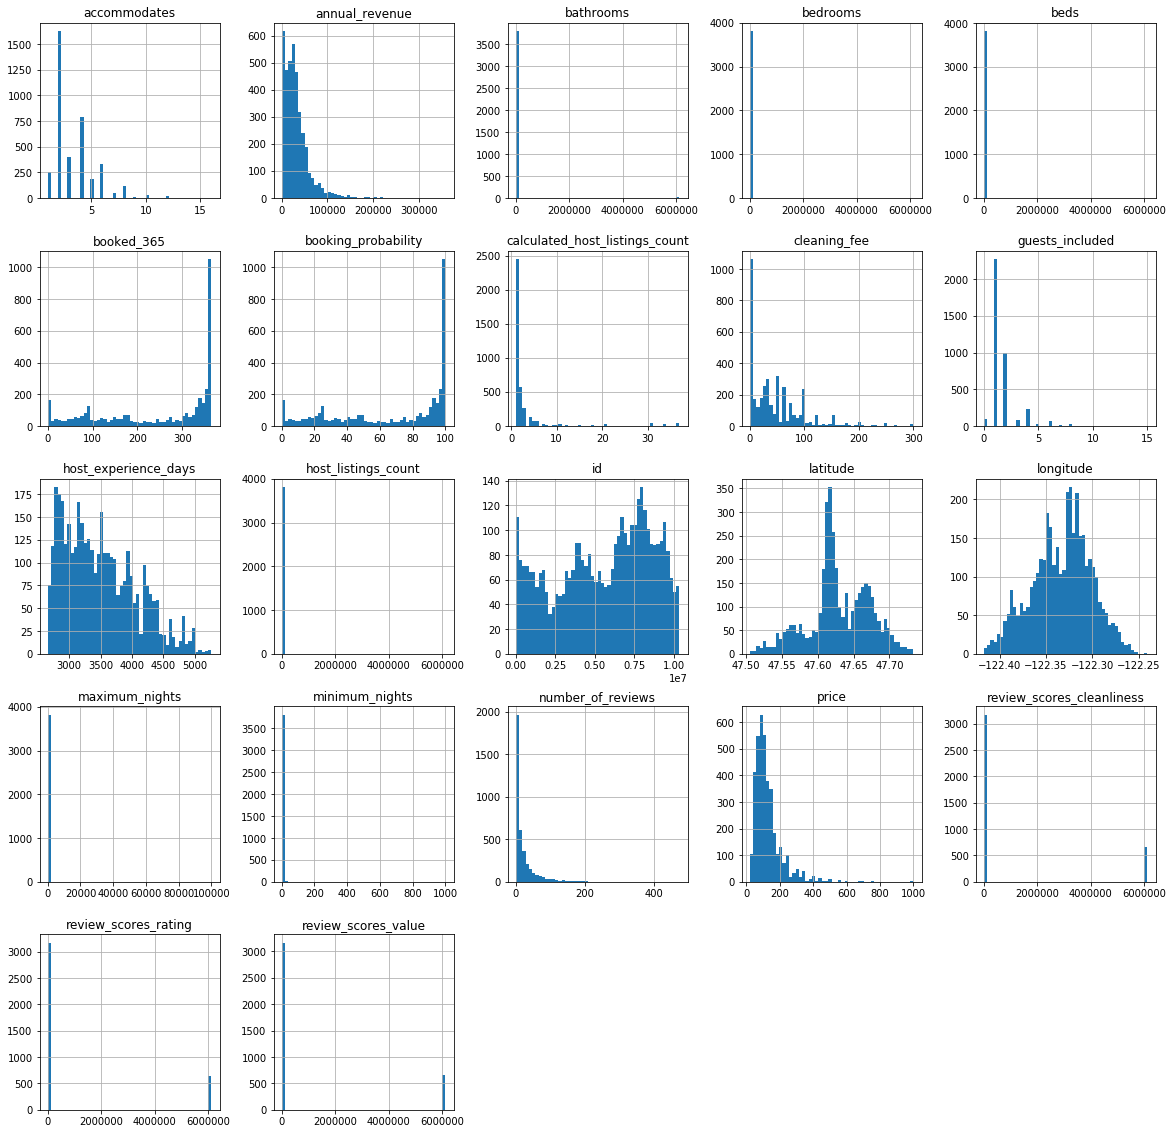

In [198]:
# show the number of instances (y-axis) for the given values(x-axis) and the ranges of the values
airbnb_df1.hist(bins =50, figsize = (20, 20))
plt.show()

In [199]:
#correlation of the numerical features
corr = airbnb_df1.corr()
corr

,id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,booked_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_value,calculated_host_listings_count,annual_revenue,booking_probability,host_experience_days
id,1.000000,0.028935,-0.016143,0.013360,-0.074279,-0.114455,-0.057432,-0.026998,-0.046289,-0.122722,-0.103058,-0.021601,0.101529,-0.159447,-0.506105,0.397856,0.399569,0.401866,-0.051348,-0.116854,-0.159447,-0.522627
host_listings_count,0.028935,1.000000,-0.006715,-0.010206,-0.015600,-0.001484,-0.000898,-0.000371,0.011822,-0.014895,-0.011759,-0.001220,-0.002871,-0.035883,-0.013499,0.050686,0.050405,0.050265,-0.007516,-0.020357,-0.035883,0.000807
latitude,-0.016143,-0.006715,1.000000,-0.155092,0.000335,0.029397,-0.019875,0.026190,-0.008904,0.003279,0.034452,-0.001222,-0.004705,0.000565,-0.032761,0.014222,0.017132,0.018842,0.026750,-0.016329,0.000565,0.007716
longitude,0.013360,-0.010206,-0.155092,1.000000,-0.071584,0.004462,-0.007872,-0.015472,-0.102420,-0.078980,-0.023828,0.003406,-0.010435,-0.007926,-0.008260,-0.016267,-0.014983,-0.014620,0.086343,-0.087764,-0.007926,-0.017437
accommodates,-0.074279,-0.015600,0.000335,-0.071584,1.000000,-0.005311,-0.007008,0.005336,0.652218,0.630588,0.532796,0.017097,0.003291,-0.031535,-0.072978,-0.039213,-0.041214,-0.040805,-0.029525,0.472711,-0.031535,0.108575
bathrooms,-0.114455,-0.001484,0.029397,0.004462,-0.005311,1.000000,-0.002574,0.249508,-0.007081,0.000569,-0.020913,-0.001967,-0.009016,0.028360,0.027236,0.013927,0.013605,0.013445,0.010225,0.008648,0.028360,0.106702
bedrooms,-0.057432,-0.000898,-0.019875,-0.007872,-0.007008,-0.002574,1.000000,-0.000642,-0.006362,-0.011442,-0.010266,-0.002521,-0.008786,0.027875,0.027457,-0.017921,-0.018021,-0.018070,-0.000761,0.009807,0.027875,0.070332
beds,-0.026998,-0.000371,0.026190,-0.015472,0.005336,0.249508,-0.000642,1.000000,0.027275,-0.014608,-0.008300,-0.001359,0.003313,0.015352,-0.009536,0.035833,0.035634,0.035536,-0.002599,0.038836,0.015352,0.012042
price,-0.046289,0.011822,-0.008904,-0.102420,0.652218,-0.007081,-0.006362,0.027275,1.000000,0.576423,0.392875,0.017297,-0.003336,-0.015550,-0.124695,0.028792,0.027292,0.025704,-0.054092,0.743336,-0.015550,0.055510
cleaning_fee,-0.122722,-0.014895,0.003279,-0.078980,0.630588,0.000569,-0.011442,-0.014608,0.576423,1.000000,0.364955,0.030623,-0.005981,0.053624,-0.122001,-0.057434,-0.059668,-0.060049,0.160882,0.488512,0.053624,0.172685


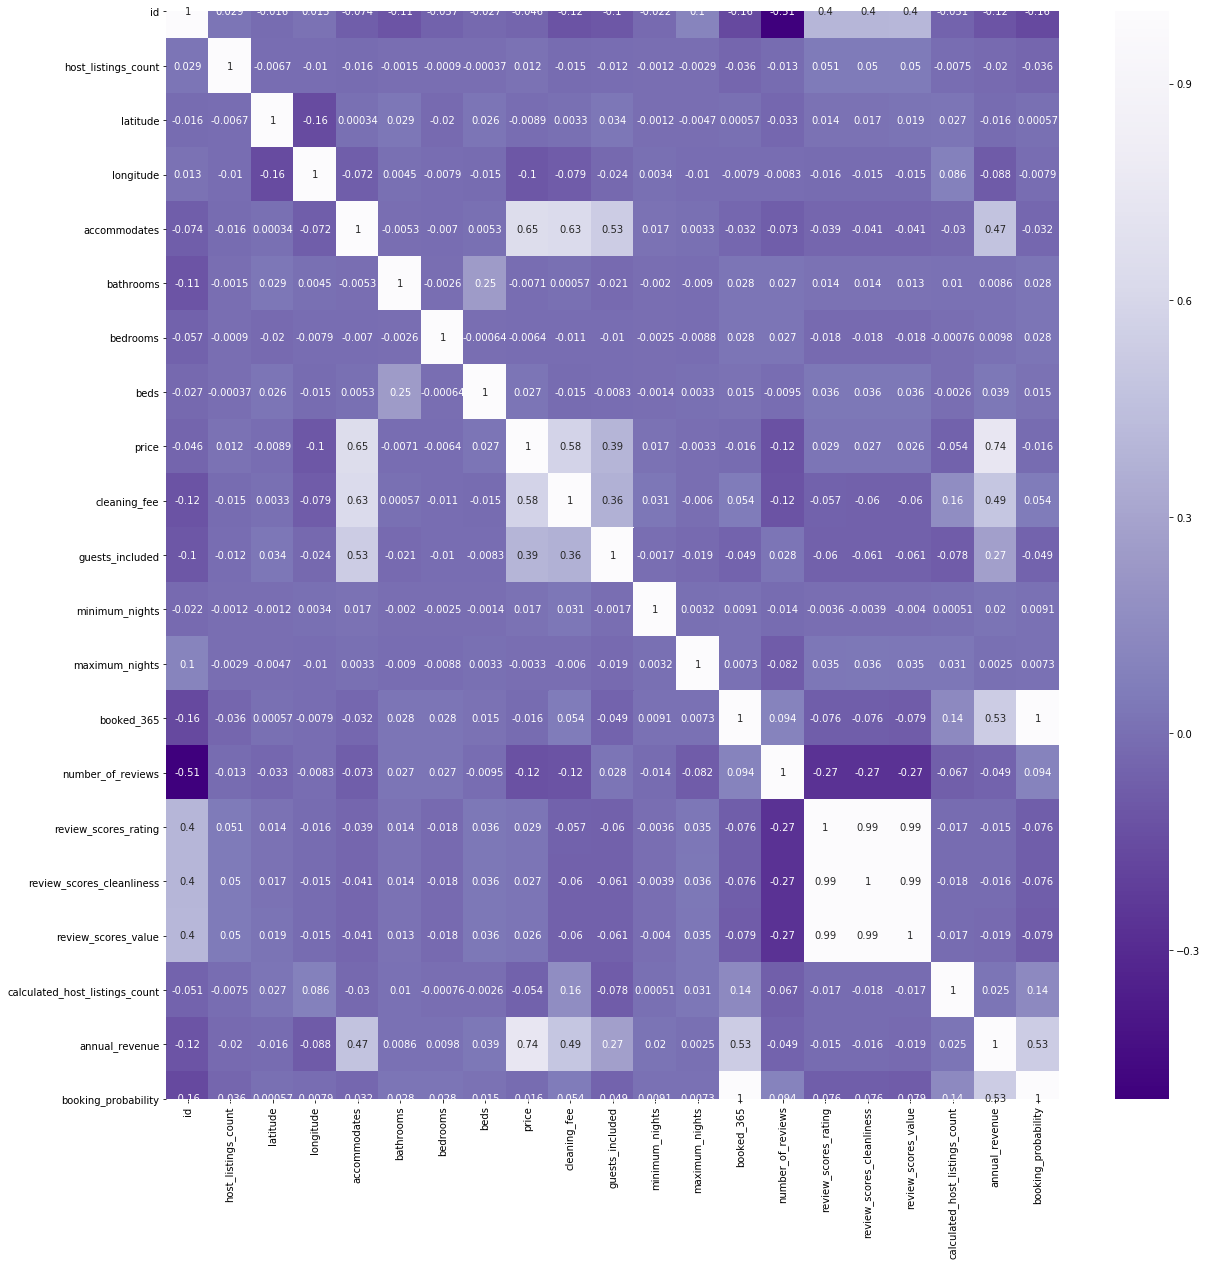

In [184]:
#heatmap of the correlation of numerical values
plt.figure(figsize = (20, 20))
sns.heatmap(data = corr, annot = True, cmap = "Purples_r")

In [200]:
#find out how each numerical variable correlates with price.
#bedroom, bathroom, maximum nights have very little correlation with price.
corr["price"].sort_values(ascending = False)


price                             1.000000
annual_revenue                    0.743336
accommodates                      0.652218
cleaning_fee                      0.576423
guests_included                   0.392875
host_experience_days              0.055510
review_scores_rating              0.028792
review_scores_cleanliness         0.027292
beds                              0.027275
review_scores_value               0.025704
minimum_nights                    0.017297
host_listings_count               0.011822
maximum_nights                   -0.003336
bedrooms                         -0.006362
bathrooms                        -0.007081
latitude                         -0.008904
booking_probability              -0.015550
booked_365                       -0.015550
id                               -0.046289
calculated_host_listings_count   -0.054092
longitude                        -0.102420
number_of_reviews                -0.124695
Name: price, dtype: float64

# Analysing features that may affect price and revenue

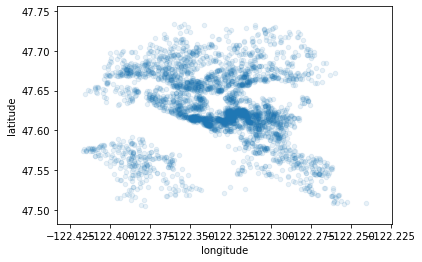

In [71]:
#shows geographical location with high and low density of airbnb accomodation.
airbnb_df1.plot(kind ="scatter", x = "longitude", y = "latitude", alpha  = 0.1)

In [72]:
#Check the different types of property. house and appartment form 90% of the property type
airbnb_df1["property_type"].value_counts(normalize = True)


House              0.454164
Apartment          0.447355
Townhouse          0.030906
Condominium        0.023834
Loft               0.010477
Bed & Breakfast    0.009691
Other              0.005762
Cabin              0.005500
Camper/RV          0.003405
Bungalow           0.003405
Boat               0.002095
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

In [359]:
#plot the average price for each property type
#sns.barplot(x= "price", y = "property_type", data = airbnb_df1).set(title = "Average price for each property type")

Comparing the Median and mean prices for each property type 

In [201]:
#split the property_group columns into groups of the different property type
property_group = airbnb_df1.groupby(["property_type"])
#check mean and median price for each property_type
property_group["price"].agg(["median", "mean", "max", "min", 'count']).sort_values(by = "median", ascending = False)



,median,mean,max,min,count
property_type,,,,,
Boat,150.0,282.375000,775.0,75.0,8
Condominium,115.0,151.109890,700.0,50.0,91
Apartment,110.0,122.932670,999.0,20.0,1708
Loft,102.5,135.700000,425.0,25.0,40
Yurt,100.0,100.000000,100.0,100.0,1
Bed & Breakfast,99.0,112.054054,299.0,30.0,37
Chalet,98.5,98.500000,135.0,62.0,2
Townhouse,97.0,129.457627,498.0,28.0,118
Bungalow,95.0,115.615385,349.0,65.0,13


Text(0.5, 0.98, 'price for each  property-type')

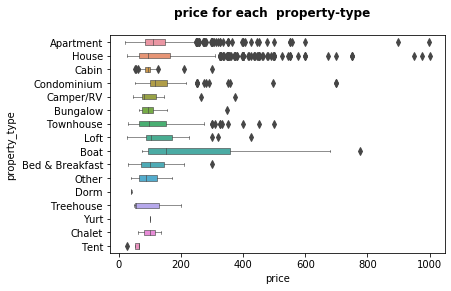

In [208]:
%matplotlib inline
sns.boxplot(data = airbnb_df1,  x= 'price', y =  'property_type',  linewidth=0.6, width=0.4)
#plt.title("proberty_type", fontsize=18, fontweight="bold")
plt.suptitle("price for each  property-type", fontweight="bold", fontsize=12)


Comparing the price for each property type versus the annual revenue

C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


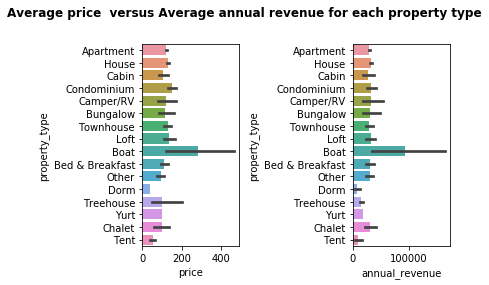

In [209]:
%matplotlib inline
#figure
fig, ax = plt.subplots(1, 2)
#plot the average price for each property type
sns.barplot(x= "price", y = "property_type", data = airbnb_df1, ax=ax[0])

#plot the average average property type for each property type
figsize =(20, 10)
sns.barplot(x= "annual_revenue", y = "property_type", data = airbnb_df1, ax=ax[1])
fig.tight_layout(h_pad =2)
fig.suptitle("Average price  versus Average annual revenue for each property type", fontweight="bold", fontsize=12)
plt.subplots_adjust(top =0.85)
fig.show()



In [210]:
#check the average anual revenue for each property type. calcuting both mean and median. Due to outliers seen in the price
property_group["annual_revenue"].agg(["median"]).sort_values(by = "median", ascending = False)

,median
property_type,
Boat,54750.0
Chalet,31632.5
Other,29316.0
Camper/RV,27375.0
Cabin,27200.0
Bungalow,27000.0
Apartment,26962.5
Loft,26020.0
House,23930.5


In [211]:
#Check the different types of room. Entire home/appartment has 67%  and private romm  has 30% of the property type
airbnb_df1["room_type"].value_counts(normalize = True)


Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64

In [212]:
#split the room_type column into groups of the different room type
room_group = airbnb_df1.groupby(["room_type"])
#check mean and median price for each property_type
room_group["price", "annual_revenue"].median().sort_values(by = "price", ascending = False)

,price,annual_revenue
room_type,,
Entire home/apt,126.0,31410.0
Private room,69.0,19642.5
Shared room,40.0,14560.0


C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


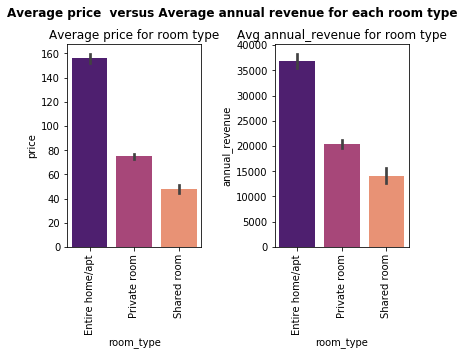

In [214]:
 #Number of listings for each room type
#
fig, ax = plt.subplots(1, 2)
#plot the average price for each property type
sns.barplot(x = "room_type", y = "price", data = airbnb_df1, palette = "magma", ax =ax[0]).set(title = "Average price for room type")
sns.barplot(x = "room_type", y = "annual_revenue", data = airbnb_df1, palette = "magma", ax =ax[1]).set(title = "Avg annual_revenue for room type")
#plot the average average property type for each property type
figsize =(20, 10)

fig.tight_layout()
#plt.xticks(rotation =90)
ax[0].tick_params(axis ='x', labelrotation =90)
ax[1].tick_params(axis ='x', labelrotation =90)
fig.suptitle("Average price  versus Average annual revenue for each room type", fontweight="bold", fontsize=12)
plt.subplots_adjust(top =0.85)
fig.show()

Average price and count for each unique  property and room type combined an

In [215]:
property_room_group = airbnb_df1.groupby(["property_type", "room_type"])
property_room_group["price"].agg(["median", "count"]).sort_values(by = "median", ascending = False)

,,median,count
property_type,room_type,,
Boat,Entire home/apt,464.5,4
Treehouse,Entire home/apt,200.0,1
Townhouse,Entire home/apt,160.0,54
House,Entire home/apt,156.0,895
Condominium,Entire home/apt,135.0,72
Chalet,Entire home/apt,135.0,1
Boat,Private room,122.5,4
Other,Entire home/apt,120.5,12
Apartment,Entire home/apt,119.0,1428


 Annual booking probability for each property and room type combination


In [216]:
property_room_group["booking_probability"].mean().sort_values(ascending = False)

property_type    room_type      
Camper/RV        Shared room        100.000000
Chalet           Private room       100.000000
Other            Shared room         98.082192
Bed & Breakfast  Shared room         97.808219
House            Shared room         96.642590
Loft             Shared room         94.520548
Other            Entire home/apt     88.904110
Condominium      Shared room         84.657534
Treehouse        Private room        83.835616
Chalet           Entire home/apt     82.465753
Loft             Private room        81.765601
Other            Private room        80.205479
Boat             Entire home/apt     78.630137
                 Private room        77.191781
Camper/RV        Entire home/apt     75.616438
House            Private room        73.492801
Bungalow         Entire home/apt     73.127854
Bed & Breakfast  Private room        72.777086
Condominium      Private room        70.928463
Townhouse        Private room        69.633230
Apartment        Private ro

Average price and avg annual revenue for each property and room type combination

In [218]:
property_room_group["price", "annual_revenue"].median().sort_values(by ="price", ascending = False)

,,price,annual_revenue
property_type,room_type,,
Boat,Entire home/apt,464.5,157982.5
Treehouse,Entire home/apt,200.0,12200.0
Townhouse,Entire home/apt,160.0,29570.0
House,Entire home/apt,156.0,35145.0
Condominium,Entire home/apt,135.0,31360.0
Chalet,Entire home/apt,135.0,40635.0
Boat,Private room,122.5,44712.5
Other,Entire home/apt,120.5,42655.0
Apartment,Entire home/apt,119.0,29535.0


Analyse neighbourhood with the highest revenue

In [221]:
#grouping neighbouhood  by their ,"property_type", "room_type"
neighbours_group = airbnb_df1.groupby(["neighbourhood_cleansed",  "room_type"])
neighbours_group["price"].agg(["median", "count"]).sort_values(by = "median", ascending = False)

,,median,count
neighbourhood_cleansed,room_type,,
Sunset Hill,Entire home/apt,350.0,8
Industrial District,Entire home/apt,265.0,3
Southeast Magnolia,Entire home/apt,225.0,13
Holly Park,Entire home/apt,215.0,3
Arbor Heights,Entire home/apt,200.0,3
Westlake,Entire home/apt,192.5,12
Lawton Park,Entire home/apt,189.0,18
Briarcliff,Entire home/apt,187.5,10
Fauntleroy,Entire home/apt,171.0,6


In [222]:
#airbnb_df1["neighbourhood_cleansed"].unique()

In [287]:
(airbnb_df1["neighbourhood_cleansed"].value_counts(normalize = True)).head(20)


Broadway                     0.103981
Belltown                     0.061289
Wallingford                  0.043740
Fremont                      0.041383
Minor                        0.035359
University District          0.031954
Stevens                      0.031168
First Hill                   0.028287
Central Business District    0.026977
Lower Queen Anne             0.024620
Greenwood                    0.023311
East Queen Anne              0.021477
North Beacon Hill            0.020430
Phinney Ridge                0.019120
Adams                        0.018334
Ravenna                      0.017548
Mann                         0.017548
West Queen Anne              0.017025
West Woodland                0.016763
Columbia City                0.015191
Name: neighbourhood_cleansed, dtype: float64

In [288]:
#the median airbnb price and anual revenue for each group of neighbourhood /property/room_type
neighbourhood_room_group = airbnb_df1.groupby(["neighbourhood_cleansed", "property_type", "room_type"])
(neighbourhood_room_group[["price", "annual_revenue"]].median().sort_values(by = "annual_revenue", ascending = False)).head(50)




,,,price,annual_revenue
neighbourhood_cleansed,property_type,room_type,,
Wallingford,Boat,Entire home/apt,680.0,225080.0
Westlake,Boat,Entire home/apt,512.0,186105.0
Holly Park,Camper/RV,Entire home/apt,375.0,136875.0
Industrial District,Loft,Entire home/apt,320.0,116800.0
High Point,Apartment,Private room,300.0,109500.0
Pioneer Square,Loft,Entire home/apt,300.0,105600.0
North Admiral,Condominium,Entire home/apt,297.0,105336.0
Lawton Park,Condominium,Entire home/apt,280.0,102200.0
Portage Bay,House,Entire home/apt,380.0,93805.0


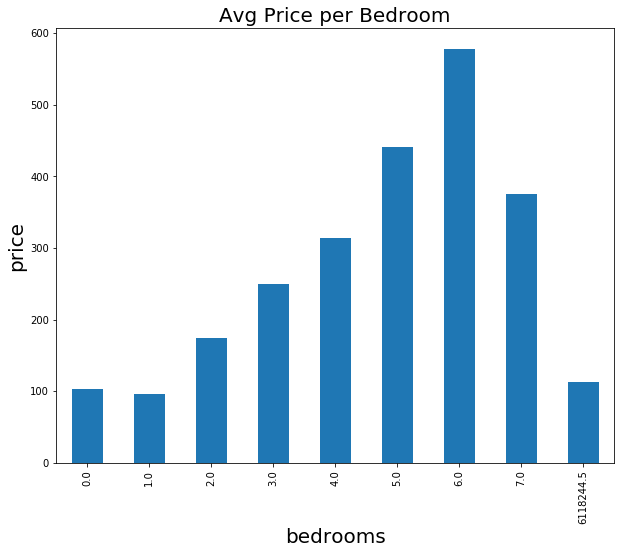

In [106]:
plt.figure(figsize=(10,8))
airbnb_df1.groupby('bedrooms').mean()['price'].plot(kind='bar')
plt.title("Avg Price per Bedroom", size=20)
plt.xlabel("bedrooms", size=20)
plt.ylabel('price', size=20)
plt.show()

In [242]:
#real beds are prefered and used more than the other types of beds
airbnb_df1["bed_type"].value_counts(normalize = True)

Real Bed         0.957831
Futon            0.019382
Pull-out Sofa    0.012310
Airbed           0.007072
Couch            0.003405
Name: bed_type, dtype: float64

In [243]:
#check the average price, annual revenue and booking_probability for each bed type
bed_type_group = airbnb_df1.groupby(["bed_type"])
bed_type_group["price", "annual_revenue", "booking_probability"].mean().sort_values(by = "price", ascending = False)

,price,annual_revenue,booking_probability
bed_type,,,
Real Bed,130.368882,31689.513536,67.011661
Pull-out Sofa,77.276596,22360.000000,75.021860
Airbed,73.962963,18605.000000,60.933536
Futon,72.824324,17594.608108,68.045168
Couch,64.307692,13554.769231,59.283456


In [227]:
#effect of the cancellation_policy on price
airbnb_df1["cancellation_policy"].value_counts(normalize = True)

strict      0.371137
moderate    0.327658
flexible    0.301205
Name: cancellation_policy, dtype: float64

In [335]:
cancel_policy_group = airbnb_df1.groupby(["cancellation_policy"])
cancel_policy_group ["price", "annual_revenue", "booking_probability"].mean().sort_values(by = "price", ascending = False)

,price,annual_revenue,booking_probability
cancellation_policy,,,
strict,154.597036,38843.792519,69.489661
moderate,114.775380,27001.953637,65.660348
flexible,109.534783,26172.974783,65.592138


[Text(0.5, 1.0, 'price and cancellation_policy relation')]

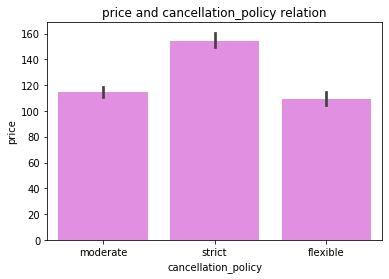

In [244]:
figsize = (10,8)
sns.barplot(x="cancellation_policy",
            y= "price", 
            data = airbnb_df1,
            color = "violet" ).set(title = "price and cancellation_policy relation")

In [245]:
#analyse the effect of accomdate and guest_included on price. guests_included will be deleted since 
#accommodates has more influence on pricing per customer.lik 

airbnb_df1[["accommodates", "guests_included"]]

,accommodates,guests_included
0,4,2
1,4,1
2,11,10
3,3,1
4,6,6
...,...,...
3813,6,1
3814,4,3
3815,2,2
3816,2,1


In [246]:
# drop guest_included since it seems to reperent the number of guest a property can accommodate 
#though the values are mostly different
airbnb_df1.drop(["guests_included"], axis = 1, inplace= True)

[Text(0.5, 1.0, 'Avg price for the number of persons a  property accommodates')]

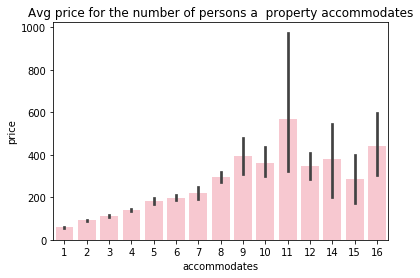

In [260]:
#plot of the average price for the number of person a property accomodates
figsize = (10,8)
sns.barplot(x="accommodates",
            y= "price", 
            data = airbnb_df1,
            color = "pink" ).set(title = "Avg price for the number of persons a  property accommodates")

#As the number of persons a property can accomdate increases the price until it reaches a point of deminishing return.

In [248]:
#check ammenities provided by the listings
airbnb_df1["amenities"].head(10)

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
5    {"Wireless Internet","Free Parking on Premises...
6    {"Wireless Internet","Free Parking on Premises...
7    {"Wireless Internet","Pets live on this proper...
8    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
9    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, dtype: object

In [249]:
#creating new columns and adding to the dataframe representing some of the ammenities. 1 if available and 0 if not.
get_amenities={"contains_tv": "tv",
                 "Pets Allowed": "Pets Allowed",
                  "contains_internet": "internet",
                  "includes_breakfast": "Breakfast",
                   "contains_air_condition": "Air Conditioning",
                  "contains_free_parking": "free parking", 
                  "contains_kitchen" : "kitchen", 
                  "24-Hour_Check-in" : "24-Hour Check-in",
                   "Family_Kid_Friendly": "Family/Kid Friendly",
                  "contains_pool" : "pool",
                   "suitable_for_events":"Suitable for Events" }
for k,v in get_amenities.items():
    airbnb_df1[k] = airbnb_df1["amenities"].apply(lambda x: 1 if v in x.lower() else 0 )


In [250]:
#Check the correlation for the created amenities columns including the price and revenue columns
amen_cols =airbnb_df1[["price", "annual_revenue", "contains_tv", "Pets Allowed", "contains_internet", "includes_breakfast","contains_air_condition",
                  "contains_free_parking",  "contains_kitchen", "24-Hour_Check-in" , "Family_Kid_Friendly", "contains_pool" ,
                   "suitable_for_events"]]
corr = amen_cols.corr()
corr

,price,annual_revenue,contains_tv,Pets Allowed,contains_internet,includes_breakfast,contains_air_condition,contains_free_parking,contains_kitchen,24-Hour_Check-in,Family_Kid_Friendly,contains_pool,suitable_for_events
price,1.000000,0.743336,0.222488,NaN,0.023868,NaN,NaN,0.079408,0.125024,NaN,NaN,0.099141,NaN
annual_revenue,0.743336,1.000000,0.165726,NaN,0.003124,NaN,NaN,0.058165,0.066816,NaN,NaN,0.109417,NaN
contains_tv,0.222488,0.165726,1.000000,NaN,0.190457,NaN,NaN,0.102536,0.190295,NaN,NaN,0.104448,NaN
Pets Allowed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contains_internet,0.023868,0.003124,0.190457,NaN,1.000000,NaN,NaN,0.113983,0.202022,NaN,NaN,0.009154,NaN
includes_breakfast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contains_air_condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contains_free_parking,0.079408,0.058165,0.102536,NaN,0.113983,NaN,NaN,1.000000,0.043731,NaN,NaN,0.039049,NaN
contains_kitchen,0.125024,0.066816,0.190295,NaN,0.202022,NaN,NaN,0.043731,1.000000,NaN,NaN,0.062203,NaN
24-Hour_Check-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
#drop all ammenities columns with NAN values
airbnb_df1.drop(["Pets Allowed", "includes_breakfast", "contains_air_condition", "24-Hour_Check-in", 
                 "Family_Kid_Friendly", "suitable_for_events"], axis=1, inplace = True)

In [343]:
#the remaining columns seem to have a positive correlation with price column.
amen_cols =airbnb_df1[["price", "annual_revenue", "contains_tv", "contains_internet",
                  "contains_free_parking",  "contains_kitchen", "contains_pool"]]
corr = amen_cols.corr()
corr

,price,annual_revenue,contains_tv,contains_internet,contains_free_parking,contains_kitchen,contains_pool
price,1.000000,0.743336,0.222488,0.023868,0.079408,0.125024,0.099141
annual_revenue,0.743336,1.000000,0.165726,0.003124,0.058165,0.066816,0.109417
contains_tv,0.222488,0.165726,1.000000,0.190457,0.102536,0.190295,0.104448
contains_internet,0.023868,0.003124,0.190457,1.000000,0.113983,0.202022,0.009154
contains_free_parking,0.079408,0.058165,0.102536,0.113983,1.000000,0.043731,0.039049
contains_kitchen,0.125024,0.066816,0.190295,0.202022,0.043731,1.000000,0.062203
contains_pool,0.099141,0.109417,0.104448,0.009154,0.039049,0.062203,1.000000


In [251]:
airbnb_df1.drop("amenities",axis=1,inplace=True)

In [424]:
#decsriptive statistics
airbnb_df1.describe()

,id,accommodates,beds,price,cleaning_fee,maximum_nights,booked_365,review_scores_rating,review_scores_cleanliness,review_scores_value,calculated_host_listings_count,annual_revenue,booking_probability,bed_per_bedroom,bathroom_per_bedroom,contains_tv,contains_internet,contains_free_parking,contains_kitchen,contains_pool
count,3.818000e+03,3818.000000,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3.818000e+03,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3818.000000,3.818000e+03,3.816000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,3.349398,1.604209e+03,127.976166,45.062860,780.447617,244.772656,1.036879e+06,1.046423e+06,1.051231e+06,2.946307,31147.202462,67.061002,1.603599e+03,2.324892e+04,0.717915,0.966998,0.567575,0.896543,0.041645
std,2.962660e+06,1.977599,9.901677e+04,90.250022,49.913798,1683.589007,126.772526,2.295574e+06,2.304043e+06,2.308235e+06,5.893029,29621.065125,34.732199,9.901678e+04,3.665717e+05,0.450073,0.178664,0.495478,0.304595,0.199802
min,3.335000e+03,1.000000,1.000000e+00,20.000000,0.000000,1.000000,0.000000,2.000000e+01,3.000000e+00,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.258256e+06,2.000000,1.000000e+00,75.000000,0.000000,60.000000,124.000000,9.400000e+01,9.000000e+00,9.000000e+00,1.000000,12100.750000,33.972603,1.000000e+00,6.666667e-01,0.000000,1.000000,0.000000,1.000000,0.000000
50%,6.118244e+06,3.000000,1.000000e+00,100.000000,30.000000,1125.000000,308.000000,9.700000e+01,1.000000e+01,1.000000e+01,1.000000,25047.000000,84.383562,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000
75%,8.035127e+06,4.000000,2.000000e+00,150.000000,65.000000,1125.000000,360.000000,1.000000e+02,1.000000e+01,1.000000e+01,2.000000,40710.000000,98.630137,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.034016e+07,16.000000,6.118244e+06,1000.000000,300.000000,100000.000000,365.000000,6.118244e+06,6.118244e+06,6.118244e+06,37.000000,358000.000000,100.000000,6.118244e+06,6.118244e+06,1.000000,1.000000,1.000000,1.000000,1.000000


Analysing  categorical columns words in columns with text

(-0.5, 399.5, 199.5, -0.5)

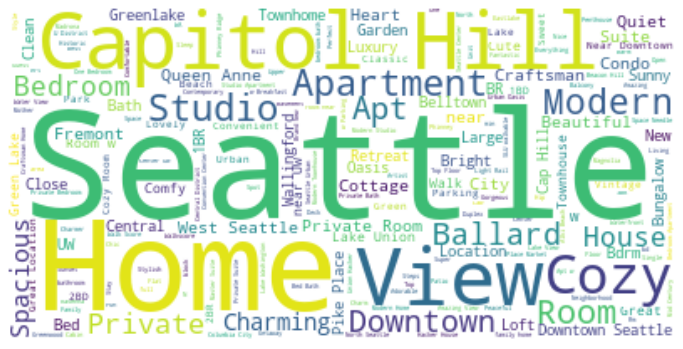

In [253]:
#check what descriptive names are frequently used (name column)
%matplotlib inline
text = " ".join(i for i in airbnb_df1.name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords =stopwords, background_color = "white").generate(text)
plt.figure(figsize =( 12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

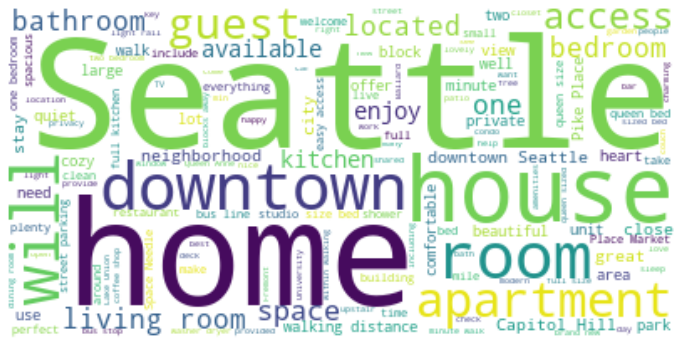

In [257]:
# Analysing the description column
texts = " ".join(i for i in airbnb_df1.description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords =stopwords, background_color = "white").generate(texts)
plt.figure(figsize =( 12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

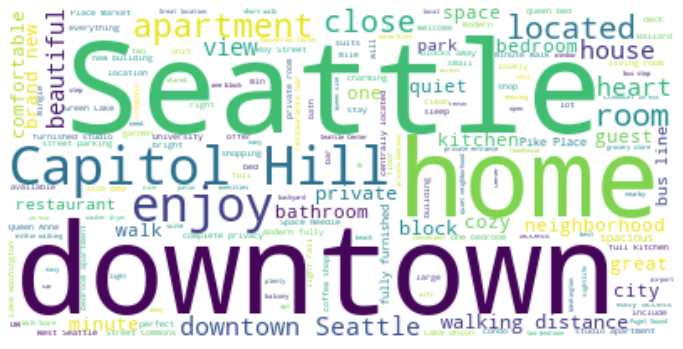

In [256]:

#analysing the summary column 
texts = " ".join(i for i in airbnb_df1.summary)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords =stopwords, background_color = "white").generate(texts)
plt.figure(figsize =( 12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [258]:
airbnb_df1.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered', 'transit', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'state', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'booked_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_value', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_phone_verification', 'calculated_host_listings_count', 'annual_revenue', 'booking_probability', 'host_experience_days', 'contains_tv',
       'Pets

In [259]:
# checking if a host being a super_host comes with the experience
pd.crosstab(airbnb_df1.host_is_superhost, airbnb_df1.host_experience_days)

host_experience_days,2657,2658,2659,2661,2662,2663,2664,2669,2670,2671,2674,2676,2677,2678,2680,2681,2682,2683,2684,2686,2687,2688,2691,2692,2693,2694,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,...,4668,4679,4711,4724,4740,4742,4743,4749,4750,4757,4759,4774,4781,4783,4790,4791,4801,4811,4824,4826,4844,4845,4854,4860,4861,4870,4884,4902,4910,4924,4933,4955,4971,4974,4981,4991,4994,4995,5056,5066,5100,5127,5154,5169,5208,5267
host_is_superhost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,2,2,1,1,1,1,1,1,2,1,1,2,2,1,1,1,4,2,1,5,6,1,5,2,1,1,2,3,1,1,1,1,1,4,4,3,1,1,2,2,3,1,3,2,5,2,...,1,1,2,1,0,1,2,2,2,2,0,1,1,1,2,1,1,0,33,2,1,2,3,1,1,4,2,0,10,1,1,3,5,1,5,0,0,5,2,1,3,1,1,2,0,4
t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,6,2,1,0,0,0,0,0,0,1,0


[Text(0.5, 1.0, 'Avg price for the number of persons a  property accommodates')]

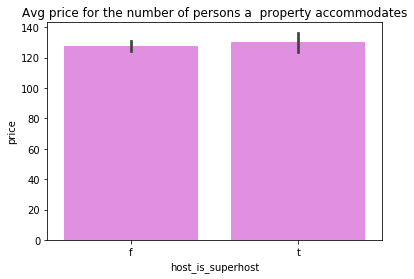

In [261]:
#checking the pricing of superhost listings 
figsize = (10,8)
sns.barplot(x="host_is_superhost",
            y= "price", 
            data = airbnb_df1,
            color = "violet" ).set(title = "Avg price for the number of persons a  property accommodates")

#superhost have  just a slightly higher price

[Text(0.5, 1.0, 'pricing and cleaning fee relationship')]

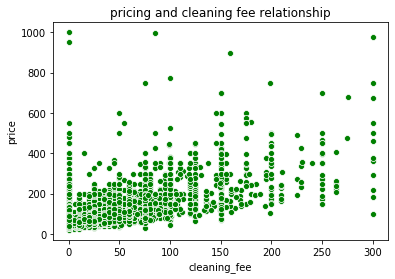

In [265]:
#checking the effect of charging for cleaning fee on pricing 
figsize = (10,8)
sns.scatterplot(x="cleaning_fee",
            y= "price", 
            data = airbnb_df1,
            color = "green" ).set(title = "pricing and cleaning fee relationship")
#cheaper listing seem to charge for cleaning services.

[Text(0.5, 1.0, 'price and extra_people relationship')]

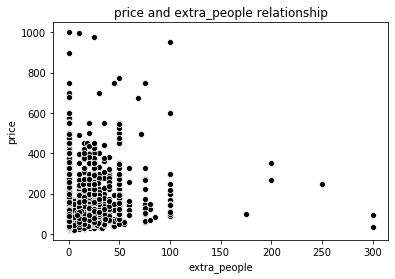

In [294]:
#checking if the fee paid for having extra people does have impact on the price
#pylab.rcParams['xtick.major.pad'] = '8'
#pylab.rcParams['xtick.major.pad'] = '8'
figsize = (20,10)
ax = sns.scatterplot(x= "extra_people", 
            y= "price",   
            data = airbnb_df1,
            color = "black" )
ax.set(title = "price and extra_people relationship")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [384]:
#replacing any inf value that resulted from the creation of  "bathroom_per_bedroom" and "bed_per_bedroom" from divison method
#airbnb_df1.replace([np.inf, -np.inf], 0, inplace =True)

In [266]:
#rounding up the floating point values in this column
#airbnb_df1["bathroom_per_bedroom"].apply(np.ceil)

In [267]:
#rounding up the floating point values in this column
#airbnb_df1["bed_per_bedroom"].apply(np.ceil)

# Part Two: Predicting price with machine learning models

In [390]:
# copy the the original unprocessed  data into a new variable
airbnb_df3 = airbnb_df.copy()

In [391]:
#convert this new price to float and remove dollar sign using the already created function
airbnb_df3["price"]=airbnb_df3["price"].apply(lambda x: delete_dollar_sign(x))
airbnb_df3["price"]

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [392]:
#remove dollar sign and convert to float from the new copy of the data
airbnb_df3["cleaning_fee"] = airbnb_df3["cleaning_fee"].apply(lambda x: delete_dollar_sign(x))
airbnb_df3["cleaning_fee"]

0         NaN
1        40.0
2       300.0
3         NaN
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      NaN
Name: cleaning_fee, Length: 3818, dtype: float64

In [393]:
#Fill in NaN values with zero 
airbnb_df3["cleaning_fee"].fillna(0, inplace=True)
airbnb_df3["cleaning_fee"].isnull().sum()

0

In [394]:
airbnb_df3["extra_people"] = airbnb_df3["extra_people"].apply(lambda x: delete_dollar_sign(x))
airbnb_df3["extra_people"] 

0        5.0
1        0.0
2       25.0
3        0.0
4       15.0
        ... 
3813     0.0
3814    25.0
3815    20.0
3816     0.0
3817     0.0
Name: extra_people, Length: 3818, dtype: float64

In [395]:
#check miising values
airbnb_df3["extra_people"].isnull().sum()

0

In [396]:
airbnb_df3["minimum_nights"].unique()

array([   1,    2,    4,    3,    5,   14,   30,   21,   20,    7,    6,
         26,   15,   12,   10,   13,   31,    8, 1000,   28,   11,   29],
      dtype=int64)

In [397]:
airbnb_df3["price"]

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [398]:
#create new columns from the amenities column and add to the dataframe representing some of the ammenities.
#1 if available and 0 if not.
get_amenity ={"contains_tv": "tv",
              "contains_internet": "internet",
              "contains_free_parking": "free parking", 
              "contains_kitchen" : "kitchen", 
              "contains_pool" : "pool"}
for k, v in get_amenity.items():
    airbnb_df3[k] = airbnb_df3["amenities"].apply(lambda x: 1 if v in x.lower() else 0 )
    
   

In [438]:
airbnb_df3['booking_probability'] = airbnb_df1['booking_probability']

In [439]:
airbnb_df3['host_experience_days'] = airbnb_df1['host_experience_days']

In [440]:
airbnb_df3['booked_365'] = airbnb_df1['booked_365']

In [453]:
airbnb_df3.dtypes

name                                 object
transit                              object
host_since                           object
host_is_superhost                    object
host_identity_verified               object
neighbourhood_cleansed               object
zipcode                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                               float64
cleaning_fee                        float64
extra_people                        float64
minimum_nights                        int64
review_scores_rating                float64
review_scores_cleanliness       

From the data exploration, some attributes were discovered to be more relevant than others. So the less relevant ones will be 
dropped before the model training and testing

# Handle missing values in the newly copied data


In [403]:
airbnb_df3.drop(["host_since","experiences_offered", 'host_response_time', 'host_response_rate', "space", 'host_has_profile_pic', 'host_acceptance_rate',
                'number_of_reviews','space','neighborhood_overview', 'notes', 'availability_365',
                 "host_about", "host_acceptance_rate", 'host_neighbourhood', "country_code", "country", "city", 
                 "state", "host_verifications", "host_location","smart_location", "summary", "id", "smart_location",
                "jurisdiction_names", "market", "requires_license", "calendar_last_scraped", "host_name",
                 "host_id","host_picture_url", "street", "description", "calendar_updated", 
                     "scrape_id", "host_url", "last_scraped",  "host_thumbnail_url", "host_listings_count", "neighbourhood",
                 "amenities", "monthly_price", "guests_included", "maximum_nights", "license","security_deposit", 
                 "square_feet", "listing_url", 'neighbourhood_group_cleansed', 
                    "picture_url", "availability_30","availability_60", "has_availability", "availability_90", 'xl_picture_url', "weekly_price",
               "host_total_listings_count",'thumbnail_url', 'medium_url', 'xl_picture_url', 'review_scores_accuracy',
                 'review_scores_location', 'review_scores_checkin','review_scores_accuracy','reviews_per_month', 
                 'first_review', 'last_review','review_scores_communication'], axis =1, inplace=True)

In [ ]:
numerical_col = ['contains_internet', 'contains_kitchen' ,'minimum_nights', 'host_experience_days',
                 'contains_pool', 'cleaning_fee', "contains_tv", "calculated_host_listings_count", 'booking_probability',
                  "review_scores_value", "review_scores_rating", 'bathrooms', "review_scores_cleanliness", "beds", 'booked_365',
                 "accommodates", "bedrooms", "longitude", "latitude",  'extra_people']                                
categorical_col = ['host_is_superhost','require_guest_profile_picture', 'host_identity_verified', "zipcode",
                   'neighbourhood_cleansed', 'is_location_exact', 'property_type', 'room_type', 'instant_bookable', 
                   'cancellation_policy', 'require_guest_phone_verification', 'bed_type', 'transit', "name", 'contains_free_parking'] 



In [ ]:
numerical_col = ['contains_internet', 'contains_kitchen' ,'minimum_nights', 'host_experience_days',
                 'contains_pool', 'cleaning_fee', "contains_tv", "calculated_host_listings_count", 'booking_probability',
                  "review_scores_value", "review_scores_rating", 'bathrooms', "review_scores_cleanliness", "beds", 'booked_365',
                 "accommodates", "bedrooms", "longitude", "latitude",  'extra_people']                                
categorical_col = ['host_is_superhost','require_guest_profile_picture', 'host_identity_verified', "zipcode",
                   'neighbourhood_cleansed', 'is_location_exact', 'property_type', 'room_type', 'instant_bookable', 
                   'cancellation_policy', 'require_guest_phone_verification', 'bed_type', 'transit', "name", 'contains_free_parking'] 

y_price = airbnb_df3["price"]
x_pred = airbnb_df3.drop(["price"], axis =1)

x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(x_pred, y_price, test_size = 0.3, random_state =40)

#handlinging with missing values
numeric_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='mean', missing_values = np.nan)),     
   ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent', missing_values = np.nan))]) #,('onehot', OneHotEncoder(sparse = False))])

imputer = ColumnTransformer(
   remainder = 'passthrough',
   transformers=[
       ('numerical', numeric_transformer, numerical_col),
       ('categorical', categorical_transformer, categorical_col)])
#transform the testing and training predictors seperately to avoid data leakage
fill_x_train = imputer.fit_transform(x_pred_train)
fill_x_test = imputer.transform(x_pred_test)

x_pred_train_preped = pd.DataFrame(fill_x_train, columns = ['transit', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
        'booking_probability', 'booked_365', "zipcode", "name",
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
        'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'contains_tv', 'contains_internet',
       'contains_free_parking', 'contains_kitchen', 'contains_pool'])
x_pred_train_preped.shape 

x_pred_test_preped = pd.DataFrame(fill_x_test, columns = ['transit', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
        'booking_probability', 'booked_365', "zipcode", "name",
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
        'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'contains_tv', 'contains_internet',
       'contains_free_parking', 'contains_kitchen', 'contains_pool'])
#x_pred_test_preped

In [464]:
#assign the response variable before any further processing with the rest of the data
y_price = airbnb_df3["price"]
x_pred = airbnb_df3.drop(["price"], axis =1)

In [497]:
#split the response variable and the transformed predictors in to training and testing parts
#np.random.seed(40)
x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(x_pred, y_price, test_size = 0.3, random_state =40)


In [498]:
x_pred_train.shape , x_pred_test.shape, y_price_train.shape, y_price_test.shape 

((2672, 35), (1146, 35), (2672,), (1146,))

In [499]:
#handlinging with missing values
numeric_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='mean', missing_values = np.nan)),     
   ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent', missing_values = np.nan))]) #,('onehot', OneHotEncoder(sparse = False))])

In [500]:
imputer = ColumnTransformer(
   remainder = 'passthrough',
   transformers=[
       ('numerical', numeric_transformer, numerical_col),
       ('categorical', categorical_transformer, categorical_col)])
#transform the testing and training predictors seperately to avoid data leakage
fill_x_train = imputer.fit_transform(x_pred_train)
fill_x_test = imputer.transform(x_pred_test)

In [501]:
x_pred_train_preped = pd.DataFrame(fill_x_train, columns = ['transit', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
        'booking_probability', 'booked_365', "zipcode", "name",
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
        'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'contains_tv', 'contains_internet',
       'contains_free_parking', 'contains_kitchen', 'contains_pool'])
x_pred_train_preped.shape 

(2672, 35)

In [502]:
x_pred_test_preped = pd.DataFrame(fill_x_test, columns = ['transit', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
        'booking_probability', 'booked_365', "zipcode", "name",
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
        'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'contains_tv', 'contains_internet',
       'contains_free_parking', 'contains_kitchen', 'contains_pool'])
#x_pred_test_preped

In [503]:
x_pred_test_preped, x_pred_train_preped, 

((1146, 35), (2672, 35))

In [504]:
#encode categories in to numbers in both the  prepared x training and testing set 
one_hot= OneHotEncoder(handle_unknown = 'ignore')
transformer = ColumnTransformer([('one_hot', one_hot, categorical_col,)],  remainder = 'passthrough')
x_pred_trainer = transformer.fit_transform(x_pred_train_preped[categorical_col])
x_pred_tester = transformer.transform(x_pred_test_preped[categorical_col])

# Model 1 : Random Forest Regression for price prediction

In [476]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
np.random.seed(50)

#train a baseline model with default parameters
rf_reg_model1 = RandomForestRegressor()
rf_reg_model1.fit(x_pred_trainer, y_price_train)

#evaluate trained model on testing set
rf_price_prediction = rf_reg_model1.predict(x_pred_tester)
rf_mse_score = mean_squared_error(y_price_test , rf_price_prediction )
rf_rmse_score = np.sqrt(rf_mse_score)
rf_r2_score = r2_score(y_price_test , rf_price_prediction )
rf_mae_score  = mean_absolute_error(y_price_test , rf_price_prediction )

In [483]:
# funtion to print the regression model evaluation metrics

def display_scores(w,x, y, z):
    print(" The MSE is = ", w)
    print(" The RMSE is = ", x)
    print(" The R2 is = ", y)
    print("the MAE is = ", z)



Display test results for the trained random forest model 

In [484]:
display_scores(rf_mse_score,  rf_rmse_score, rf_r2_score, rf_mae_score)

 The MSE is =  6472.644786040585
 The RMSE is =  80.4527487786501
 The R2 is =  0.20385512972936193
the MAE is =  50.03219617662951


Hyperparameter search for the RF model using gridsearchcv

In [477]:
from sklearn.model_selection import GridSearchCV

p_grid = {"n_estimators": [80, 85, 90, 100, 110, 120],
               'max_features': [6, 8, 10, 12, 14, 16, 20, 22],
               "max_features": ["sqrt", "log2"],
                 "max_depth": [4,6,8],
                'random_state' : [20]}
np.random.seed(50)
#x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
#rf_model_price_tune = RandomForestRegressor(n_jobs =-1)
GridSearch_rf =GridSearchCV(estimator = RandomForestRegressor(),
                              param_grid = p_grid,
                            cv= 10)
GridSearch_rf.fit(x_pred_trainer, y_price_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [80, 85, 90, 100, 110, 120],
                         'random_state': [20]})

In [479]:
#display best parameter
GridSearch_rf.best_params_
#{'max_depth': 8,
 #'max_features': 'sqrt',
# 'n_estimators': 120,
# 'random_state': 20}

{'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 120,
 'random_state': 20}

In [480]:

#split transfromed  into training and tesing set of the x and y attributes
#ix_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
# train model
rf_reg_model_best = RandomForestRegressor(  n_estimators = 120,
                                             max_depth = 8,
                                           max_features = 'sqrt',
                                          random_state = 20)
rf_reg_model_best.fit(x_pred_trainer, y_price_train)
#evaluate trained model on training set
rf_price_prediction = rf_reg_model_best.predict(x_pred_tester)
rf_mse_score = mean_squared_error(y_price_test , rf_price_prediction )
rf_rmse_score = np.sqrt(rf_mse_score)
rf_r2_score = r2_score(y_price_test , rf_price_prediction)
rf_mae_score = mean_absolute_error(y_price_test , rf_price_prediction)

In [485]:
display_scores( rf_mse_score, rf_rmse_score , rf_r2_score, rf_mae_score)


 The MSE is =  6472.644786040585
 The RMSE is =  80.4527487786501
 The R2 is =  0.20385512972936193
the MAE is =  50.03219617662951


In [489]:
from sklearn.model_selection import cross_val_score
#k-fold cross validation , randomly splits the train set in to 10 folds. train on 9 set and evaluates
#on the 1 validation settest on
np.random.seed(50)
scores = cross_val_score(rf_reg_model_best, x_pred_trainer, y_price_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

In [492]:
rf_rmse_scores 

array([ 87.02238558,  74.83576773,  84.78877758,  63.53879934,
        74.85903235,  89.60039032, 106.15430597,  70.23436257,
        72.50707   ,  75.50758762])

In [490]:
#train set result the model on the train set 
def score_display_cv(model_scores):
    print("scores :", model_scores)
    print("mean:", model_scores.mean())
    print("standard deviationu:", model_scores.std())

In [494]:
score_display_cv(-scores)


scores : [ 7572.89559141  5600.39213165  7189.1368028   4037.17902151
  5603.87472375  8028.22994541 11268.73667637  4932.86568576
  5257.27519966  5701.39578744]
mean: 6519.198156574948
standard deviationu: 1975.2096248684584


In [636]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(airbnb_df[numerical_col], figsize=(12, 8))
#save_fig("scatter_correlation_matrix_plot")

Text(0.5, 1.0, 'Randon Forest Feature importance')

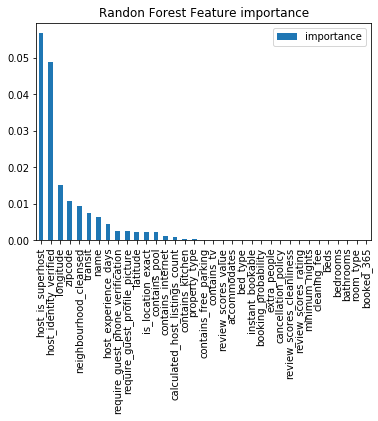

In [495]:
np.random.seed(50)
feat = {}
for feature, importance in zip(x_pred.columns, rf_reg_model_best.feature_importances_):
    feat[feature] = importance
importances = pd.DataFrame.from_dict(feat, orient= 'index').rename(columns={0: 'importance'})
importances.sort_values(by = 'importance', ascending = False).plot(kind='bar')
plt.title("Randon Forest Feature importance")          

In [496]:
importances.sort_values( by = ["importance"], ascending =False)

,importance
host_is_superhost,0.056789
host_identity_verified,0.048908
longitude,0.015195
zipcode,0.010898
neighbourhood_cleansed,0.009410
transit,0.007383
name,0.006285
host_experience_days,0.004477
require_guest_phone_verification,0.002563
require_guest_profile_picture,0.002557


# Model 2: Linear SVR model 

In [506]:
#split transfromed  into training and tesing set of the x and y attributes
#x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
# train model
np.random.seed(50)
linear_SVR_model = LinearSVR()
linear_SVR_model.fit(x_pred_trainer, y_price_train)
#evaluate trained model on training set
lsvr_price_prediction = linear_SVR_model.predict(x_pred_tester)
lsvr_mse_score = mean_squared_error(y_price_test , lsvr_price_prediction )
lsvr_rmse_score = np.sqrt(lsvr_mse_score)
lsvr_r2_score = r2_score(y_price_test , lsvr_price_prediction)
lsvr_mae_score = mean_absolute_error(y_price_test , lsvr_price_prediction)

#l_svr_mse_score = mean_squared_error(y_price_train , l_svr_price_prediction)
#l_svr_rmse_score = np.sqrt(l_svr_mse_score)
#l_svr_rmse_score

In [507]:
display_scores(lsvr_mse_score, lsvr_rmse_score, lsvr_r2_score, lsvr_mae_score)

 The MSE is =  5003.852025615976
 The RMSE is =  70.73791080895715
 The R2 is =  0.3845188090069057
the MAE is =  38.03517117434499


In [508]:
p_grid1 = {'C':[10, 20, 22],
            "epsilon": [ 0.2, 0.4, 0.6]}
np.random.seed(50)
#x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
#rf_model_price_tune = RandomForestRegressor(n_jobs =-1)
lsvr = LinearSVR()
GridSearch_lsvr =GridSearchCV(estimator = lsvr,
                              param_grid = p_grid1,
                             scoring = "neg_mean_squared_error",
                             cv= 10)
                             #max_iter =)
GridSearch_lsvr.fit(x_pred_trainer, y_price_train)
GridSearch_lsvr.best_params_

{'C': 22, 'epsilon': 0.6}

In [514]:
#np.random.seed(50)
linear_SVR_model_best = LinearSVR(C = 22, epsilon = 0.)
linear_SVR_model_best.fit(x_pred_trainer, y_price_train)
#evaluate trained model on training set
lsvr_price_prediction = linear_SVR_model.predict(x_pred_tester)
lsvr_mse_score = mean_squared_error(y_price_test , lsvr_price_prediction )
lsvr_rmse_score = np.sqrt(lsvr_mse_score)
lsvr_r2_score = r2_score(y_price_test , lsvr_price_prediction)
lsvr_mae_score = mean_absolute_error(y_price_test , lsvr_price_prediction)


In [515]:
display_scores(lsvr_mse_score, lsvr_rmse_score, lsvr_r2_score, lsvr_mae_score)

 The MSE is =  5003.852025615976
 The RMSE is =  70.73791080895715
 The R2 is =  0.3845188090069057
the MAE is =  38.03517117434499


Permutation Importance  fro the linear SVR model

In [ ]:
from sklearn.inspection import permutation_importance
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
result = permutation_importance(linear_SVR_model_best, x_pred_tester , y_price_test,
                                n_repeats=30, random_state=0, scoring=scoring)

indices = np.argsort(result['importnce'])[::-1]

plt.figure()
plt.title("feature importance")
plt.bar(
    range(x_pred_trainer.shape[1]), 
    result["importances_mean"][indices],
    yeer = result["importances_std"][indices]
)
feature_names =np.array(list(airbnb_df3.columns[1:])+['random'])   
plt.xticks(range(x_pred_trainer.shape[1]), feature_names[indices], rotation=90   )

#airbnb_df3.columns[1:][indices], rotation=90 
#for metric in r_multi:
    #print(f"{metric}")
   # r = r_multi[metric]
    #for i in r.importances_mean.argsort()[::-1]:
         #if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
                #print(f"    {airbnb_df3.feature_names[i]:<8}"
                   # f"{r.importances_mean[i]:.3f}"
                    #f" +/- {r.importances_std[i]:.3f}")


# Model 3: Support Vector Regression using  linear  and non-linear kernels

In [516]:
#train a baseline nonlinear svm regression model
from sklearn.svm import SVR

nonlinear_svm_reg_model = SVR()
nonlinear_svm_reg_model.fit(x_pred_trainer, y_price_train)
#evaluate trained model on training set
svm_price_prediction = nonlinear_svm_reg_model.predict(x_pred_tester)
svm_mse_score = mean_squared_error(y_price_test , svm_price_prediction)
svm_rmse_score = np.sqrt(svm_mse_score)
svm_r2_score = r2_score(y_price_test , svm_price_prediction)
svm_mae_score = mean_absolute_error(y_price_test , svm_price_prediction)


Test result of the baseline RF model on the testing set.

In [517]:
display_scores(svm_mse_score, svm_rmse_score, svm_r2_score, svm_mae_score )

 The MSE is =  6827.289291531724
 The RMSE is =  82.62741247026754
 The R2 is =  0.16023333166230702
the MAE is =  44.04845498337983


Hyperparameter tune for Kernelized SVR

In [519]:
#hyperparameter tune for Kernelized SVR
p_grid2 = {"kernel": ['linear', 'rbf', 'poly'],
          'C':[0.5, 1.0, 1.5, 2.0, 10, 100],
           "gamma": [0.1, 0.2, 0.4, 0.6, 'auto'],
            "epsilon": [0.1, 0.2, 0.4, 0.5, 0.6]}
np.random.seed(50)
#x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
#rf_model_price_tune = RandomForestRegressor(n_jobs =-1)
svr = SVR()
GridSearch_svr =GridSearchCV(estimator = svr,
                              param_grid = p_grid2,
                             scoring = "neg_mean_squared_error",
                             cv= 5)
GridSearch_svr.fit(x_pred_trainer, y_price_train)
GridSearch_svr.best_params_

{'C': 2.0, 'epsilon': 0.1, 'gamma': 0.4, 'kernel': 'poly'}

In [520]:
#train a non-linear svr model with the best parameter from the grid search
np.random.seed(50)
svr_reg_model_best = SVR(C = 2.0, epsilon = 0.1, gamma = 0.4, kernel = 'poly')
svr_reg_model_best.fit(x_pred_trainer, y_price_train)
#evaluate trained model on testinging set
svr_price_prediction = nonlinear_svm_reg_model.predict(x_pred_tester)
svr_mse_score = mean_squared_error(y_price_test , svm_price_prediction)
svr_rmse_score = np.sqrt(svm_mse_score)
svr_r2_score = r2_score(y_price_test , svm_price_prediction)
svr_mae_score = mean_absolute_error(y_price_test , svm_price_prediction)


Results of the  non-linear SVR (with polynomial kernel) model's evaluation on the test set

In [521]:
display_scores(svr_mse_score, svr_rmse_score, svr_r2_score, svr_mae_score) 

 The MSE is =  6827.289291531724
 The RMSE is =  82.62741247026754
 The R2 is =  0.16023333166230702
the MAE is =  44.04845498337983


Model 4: K-Nearest Neighbors Regression

In [522]:
from sklearn.neighbors import KNeighborsRegressor
#x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
knn_model_reg = KNeighborsRegressor()
knn_model_reg.fit(x_pred_trainer, y_price_train)
#evaluate trained model on training set
knn_reg_prediction = knn_model_reg.predict(x_pred_tester)
knn_mse_score = mean_squared_error(y_price_test , knn_reg_prediction)
knn_rmse_score = np.sqrt(knn_mse_score)
knn_r2_score = r2_score(y_price_test ,  knn_reg_prediction)
knn_mae_score = mean_absolute_error(y_price_test ,  knn_reg_prediction)


Results of the  KNN  model's Evaluate KNN on the test set

In [523]:
display_scores(knn_mse_score, knn_rmse_score, knn_r2_score, knn_mae_score )

 The MSE is =  4962.983804537522
 The RMSE is =  70.44844785044964
 The R2 is =  0.3895456605713342
the MAE is =  41.66945898778359


In [464]:
knn_model_reg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Hyperparameter tuning using gridSearchCV for the KNN model

In [524]:
from sklearn.model_selection import KFold
#hyperparameter tuning for knn
p_grid4 = {'n_neighbors':[1,  3, 5, 7, 9,  11, 13, 15, 17, 19, 21],
            "metric": [ "euclidean", "manhattan", "minkowski"]}
#cv = KFold(n_splits =10,  random_state = 5)
#np.random.seed(50)
#x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
#rf_model_price_tune = RandomForestRegressor(n_jobs =-1)
knn_tune =  KNeighborsRegressor()
GridSearch_knn =GridSearchCV(estimator = knn_tune,
                              param_grid = p_grid4,
                             scoring = "neg_mean_squared_error",
                             cv= 10)
                             #max_iter =)
GridSearch_knn.fit(x_pred_trainer, y_price_train)
GridSearch_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 21}

Train another KNN model using the best parameters from the grid search

In [525]:
#fitting in knn with the best parameter from the grid search
knn_model_reg_best = KNeighborsRegressor(n_neighbors = 13, metric = 'euclidean' )
knn_model_reg_best.fit(x_pred_trainer, y_price_train)
#evaluate trained model on training set
knn_reg_prediction_tuned = knn_model_reg.predict(x_pred_tester)
knn_mse_score_best= mean_squared_error(y_price_test ,knn_reg_prediction_tuned)
knn_rmse_score_best = np.sqrt(knn_mse_score)
knn_r2_score_best= r2_score(y_price_test ,  knn_reg_prediction_tuned)
knn_mae_score_best= mean_absolute_error(y_price_test ,  knn_reg_prediction_tuned)


In [526]:
display_scores(knn_mse_score_best, knn_rmse_score_best, knn_r2_score_best, knn_mae_score_best )

 The MSE is =  4962.983804537522
 The RMSE is =  70.44844785044964
 The R2 is =  0.3895456605713342
the MAE is =  41.66945898778359


KNN model result plot

In [533]:
#x_ax=range(4000)
#plt.scatter(x_pred_tester, y_price_test, s=5, color="blue", label="original")
#plt.plot(x_pred_trainer, y_price_train, knn_reg_prediction_tuned, lw=1.5, color="red", label="predicted")
#plt.legend()
#plt.show()
#knn_model_reg_best.kneighbors_graph(x_pred_trainer)

Feature importance for KNN model

In [534]:
from sklearn.inspection import permutation_importance
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
result = permutation_importance(knn_model_reg_best, x_pred_tester , y_price_test,
                                n_repeats=30, random_state=0, scoring=scoring)

indices = np.argsort(result['importnce'])[::-1]

plt.figure()
plt.title("feature importance")
plt.bar(
    range(x_pred_trainer.shape[1]), 
    result["importances_mean"][indices],
    yeer = result["importances_std"][indices]
)
feature_names =np.array(list(airbnb_df3.columns[1:])+['random'])   
plt.xticks(range(x_pred_trainer.shape[1]), feature_names[indices], rotation=90   )


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

# Drop some features and retrain all the models to try and get a better model performance

In [ ]:

#numerical_col = ['contains_internet', 'contains_kitchen' ,'minimum_nights', 'host_experience_days',
                 #'contains_pool', 'cleaning_fee', "contains_tv", "calculated_host_listings_count", 'booking_probability',
                 # "review_scores_value", "review_scores_rating", 'bathrooms', "review_scores_cleanliness", "beds", 'booked_365',
                 #"accommodates", "bedrooms", "longitude", "latitude",  'extra_people']                                
#categorical_col = ['host_is_superhost','require_guest_profile_picture', 'host_identity_verified', "zipcode",
                  # 'neighbourhood_cleansed', 'is_location_exact', 'property_type', 'room_type', 'instant_bookable', 
                  # 'cancellation_policy', 'require_guest_phone_verification', 'bed_type', 'transit', "name", 'contains_free_parking'] 



In [57]:
##'booking_probability', "calculated_host_listings_count", "review_scores_cleanliness", 'cancellation_policy', 'host_identity_verified'
#'booked_365', 'require_guest_profile_picture', 'minimum_nights', 'host_experience_days', 'instant_bookable', 'require_guest_phone_verification'

In [140]:
#'contains_internet', 'contains_kitchen', 'contains_pool', 'cleaning_fee', "contains_tv", "review_scores_value", 'bathrooms', 
#"beds", "accommodates", "bedrooms", "longitude", "latitude",  'extra_people',  "zipcode",
                  # 'neighbourhood_cleansed', 'property_type', 'room_type', 'contains_free_parking', 'bed_type',

In [ ]:
# numerical_col = ['contains_internet', 'contains_kitchen', 
               #  'contains_pool', 'cleaning_fee', "contains_tv", 
                 # "review_scores_value", "review_scores_rating", 'bathrooms', "beds", 
                 #"accommodates", "bedrooms", "longitude", "latitude"]                                
#categorical_col = ['host_is_superhost',, 'host_identity_verified', "zipcode",
                   #'neighbourhood_cleansed', 'property_type', 'room_type', 
                   #'cancellation_policy', 'require_guest_phone_verification', , 'transit', "name", 'contains_free_parking'] 
#'host_experience_days',  "review_scores_cleanliness", 'instant_bookable', 'require_guest_phone_verification',
#y_price = airbnb_df3["price"]                 'require_guest_profile_picture'        'minimum_nights',      'booking_probability', 'extra_people' , 'booked_365',  "calculated_host_listings_count",
#x_pred = airbnb_df3.drop(["price"], axis =1)   'bed_type''is_location_exact'

##x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(x_pred, y_price, test_size = 0.3, random_state =40)

#handlinging with missing values
#numeric_transformer = Pipeline(steps=[
 #  ('imputer', SimpleImputer(strategy='mean', missing_values = np.nan)),     
  # ('scaler', StandardScaler())])
#categorical_transformer = Pipeline(steps=[
  # ('imputer', SimpleImputer(strategy='most_frequent', missing_values = np.nan))]) #,('onehot', OneHotEncoder(sparse = False))])

#imputer = ColumnTransformer(
 #  remainder = 'passthrough',
   #transformers=[
      # ('numerical', numeric_transformer, numerical_col),
      # ('categorical', categorical_transformer, categorical_col)])
#transform the testing and training predictors seperately to avoid data leakage
#fill_x_train = imputer.fit_transform(x_pred_train)
#fill_x_test = imputer.transform(x_pred_test)

#x_pred_train_preped = pd.DataFrame(fill_x_train, columns = ['transit', 'host_is_superhost',
      # 'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
       # 'booking_probability', 'booked_365', "zipcode", "name",
       #'latitude', 'longitude', 'is_location_exact', 'property_type',
      # 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
      # 'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
      ##  'review_scores_rating', 'review_scores_cleanliness',
      # 'review_scores_value', 'instant_bookable', 'cancellation_policy',
      # 'require_guest_profile_picture', 'require_guest_phone_verification',
      # 'calculated_host_listings_count', 'contains_tv', 'contains_internet',
      # 'contains_free_parking', 'contains_kitchen', 'contains_pool'])
#x_pred_train_preped.shape 

#x_pred_test_preped = pd.DataFrame(fill_x_test, columns = ['transit', 'host_is_superhost',
 #      'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
  #      'booking_probability', 'booked_365', "zipcode", "name",
   #    'latitude', 'longitude', 'is_location_exact', 'property_type',
    #   'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
     #  'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
      #  'review_scores_rating', 'review_scores_cleanliness',
       #'review_scores_value', 'instant_bookable', 'cancellation_policy',
      # '#require_guest_profile_picture', 'require_guest_phone_verification',
       #'calculated_host_listings_count', 'contains_tv', 'contains_internet',
       #'contains_free_parking', 'contains_kitchen', 'contains_pool'])
#x_pred_test_preped